## Ciencia de datos: Proyecto final
#### Violencia digital y de género contra personas de la política en Tuiter México
Regina Isabel Medina Rosales

#### Contexto del problema

Los espacios digitales, como la internet, se han convertidos en nuevos espacios de convivencia. Esto ha generado tipos de interacciones imprecedentes que imitan los patrones de las interacciones *offline*, pero con una nueva magnitud.  

Un ejemplo es la violencia de género y política *online*. Las redes sociales, como *Twitter*, permiten que cualquier usuario agreda a una persona por cuestiones de género. 

#### Pregunta de investigación
- ¿Las mujeres enfrentan agresiones distintas a los hombres en línea? 
    - Cantidad: ¿Los *tweets* dirigidos a mujeres que desempeñan labores políticas contienen más palabras agresivas? 
    - Cualidad: ¿Los *tweets* dirigidos a mujeres en la política usan palabras distintas a aquellas dirigidas a los hombres?

#### Metodología 
1. Recolección de tuits (n = 27588)
2. Construcción de base unificada
3. Selección muestral aleatoria (n = 5520) 
4. Clasificación manual
    - agresivos 
    - no agresivos
5. División de la muestra 
    - datos de entrenamiento
    - datos de prueba
6. Preprocesamiento de texto 
    - Manejo de arrobas, hashtagas y emojis
7. Entrenamiento y prueba de algoritmo

#### Muestra
Con ayuda de la Dra. Daniela Moctezuma, se recolectaron *tuits* de diversos usuarios que interactuaron con alguna personalidad de la política mexicana. Dichas personalidades son: 
- Mujeres
    - *Lucía Riojas*: Diputada federal independiente
    - *Olga Sánchez Cordero*: Secretaria de Gobierno 
    - *Martha Lucía Micher*: Senadora
    - *Elsa Amabel Landín*: Diputada local de Aguascalientes
        
- Hombres
    - *Marcelo Ebrard*: Secretario de Relaciones 
    - *Víctor Villalobos Arámbula*: Secretario de Agricultura
    - *Aníbal Ostoa Ortega*: Senador
    - *Guillermo Alaniz*: Diputado local de Aguascalientes
        

#### Código: Paquetería

In [2]:
# Cargar paquetería necesaria 
import pandas as pd
import numpy as np
import seaborn as sns
import preprocessor as p

from openpyxl import Workbook
import matplotlib.pyplot as plt
import microtc as microtc
from microtc.textmodel import TextModel
from sklearn.metrics import f1_score, accuracy_score
from sklearn.svm import LinearSVC

Código: Limpieza de bases de datos

In [3]:
# Importar datos
tuits_1 = pd.read_json("tuits001.txt", lines = True) # @Mary_Luisa_AG  
tuits_2 = pd.read_json("tuits002.txt", lines = True) # @LuRiojas
tuits_3 = pd.read_json("tuits003.txt", lines = True) # @vmva1950
tuits_4 = pd.read_json("tuits004.txt", lines = True) # @aostoaortega
tuits_5 = pd.read_json("tuits005.txt", lines = True) # @mariamercedg
tuits_6 = pd.read_json("tuits006.txt", lines = True) # @M_OlgaSCordero
tuits_7 = pd.read_json("tuits007.txt", lines = True) # @m_ebrard
tuits_8 = pd.read_json("tuits008.txt", lines = True) # @galaniz
tuits_9 = pd.read_json("tuits009.txt", lines = True) # @elsaamabel

In [4]:
# Añadir etiqueta de nombre de la personalidad
tuits_1['name'] = "María Luisa Albores"
tuits_2['name'] = "Lucía Riojas"
tuits_3['name'] = "Víctor Villalobos Arámbula "
tuits_4['name'] = "Aníbal Ostoa Ortega "
tuits_5['name'] = "María Merced González "
tuits_6['name'] = "Olga Sánchez Cordero"
tuits_7['name'] = "Marcelo Ebrard"
tuits_8['name'] = "Guillermo Alaniz"
tuits_9['name'] = "Elsa Amabel Landín"


In [5]:
# Añadir etiqueta del género de la personalidad
tuits_1['gender'] = "female"
tuits_2['gender'] = "female"
tuits_3['gender'] = "male"
tuits_4['gender'] = "male"
tuits_5['gender'] = "female"
tuits_6['gender'] = "female"
tuits_7['gender'] = "male"
tuits_8['gender'] = "male"
tuits_9['gender'] = "female"


In [6]:
# Añadir etiqueta de nivel o poder de goberino  
tuits_1['office'] = "executive"
tuits_2['office'] = "congress"
tuits_3['office'] = "executive"
tuits_4['office'] = "senate"
tuits_5['office'] = "senate"
tuits_6['office'] = "executive"
tuits_7['office'] = "executive"
tuits_8['office'] = "local"
tuits_9['office'] = "local"

In [7]:
# Unir bases de datos
tuits = pd.concat([tuits_1, tuits_2, tuits_3, tuits_4, tuits_5, tuits_6, tuits_7, tuits_8, tuits_9])

tuits['name'] = tuits['name'].astype('category') # Categorizar personas
tuits['gender'] = tuits['gender'].astype('category') # Categorizar género
tuits['office'] = tuits['office'].astype('category') # Categorizar nivel de gobierno

#### Naturaleza de los datos

In [8]:
# Gráficas descriptivas: género 
#Transformación de los datos
gender_tuits = pd.DataFrame({'text' : tuits.groupby('gender')['text'].count()})
gender_tuits['gender'] = gender_tuits.index
gender_tuits['percentage'] = round((gender_tuits['text']/sum(gender_tuits['text']))*100, 1)
gender_tuits


,text,gender,percentage
gender,,,
female,14854,female,53.8
male,12734,male,46.2


Text(0.9, 13000, '46.2%')

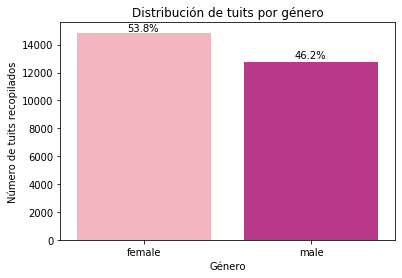

In [10]:
# Construcción de la gráfica: género
sequential_colors = sns.color_palette("RdPu", 2)
sns.set_palette(sequential_colors)
#sns.set_palette('Paired')
gender_plot = sns.barplot(x = 'gender', y ='text', data = gender_tuits)
gender_plot.set(xlabel='Género', ylabel='Número de tuits recopilados', title = "Distribución de tuits por género")
gender_plot.text(x = -0.1, y = 15000, s = "53.8%")
gender_plot.text(x = 0.9, y = 13000, s = "46.2%")

In [11]:
# Gráficas descriptivas: nivel de gobierno 
#Transformación de los datos
office_tuits = pd.DataFrame({'text' : tuits.groupby('office')['text'].count()})
office_tuits['office'] = office_tuits.index
office_tuits['percentage'] = round((office_tuits['text']/sum(office_tuits['text']))*100, 1)
office_tuits

,text,office,percentage
office,,,
congress,908,congress,3.3
executive,26560,executive,96.3
local,18,local,0.1
senate,102,senate,0.4


Text(2.9, 300, '0.4%')

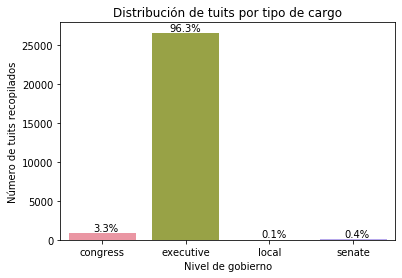

In [12]:
# Contrucción de la gráfica: nivel de gobierno
sequential_colors = sns.color_palette("RdPu", 2)
sns.set_palette(sequential_colors)
office_plot = sns.barplot(x = 'office', y ='text', data = office_tuits)
office_plot.set(xlabel='Nivel de gobierno', ylabel='Número de tuits recopilados', title = "Distribución de tuits por tipo de cargo")
# Etiquetas de porcentajes 
office_plot.text(x = -0.1, y = 1100, s = "3.3%")
office_plot.text(x = 0.8, y = 26700, s = "96.3%")
office_plot.text(x = 1.9, y = 300, s = "0.1%")
office_plot.text(x = 2.9, y = 300, s = "0.4%")

In [13]:
# Estadísticas descriptivas: personas 
#Transformación de los datos
name_tuits = pd.DataFrame({'text' : tuits.groupby('name')['text'].count()})
name_tuits['name'] = name_tuits.index
name_tuits['percentage'] = round((name_tuits['text']/sum(name_tuits['text']))*100, 1)
name_tuits

,text,name,percentage
name,,,
Aníbal Ostoa Ortega,92,Aníbal Ostoa Ortega,0.3
Elsa Amabel Landín,14,Elsa Amabel Landín,0.1
Guillermo Alaniz,4,Guillermo Alaniz,0.0
Lucía Riojas,908,Lucía Riojas,3.3
Marcelo Ebrard,12174,Marcelo Ebrard,44.1
María Luisa Albores,1,María Luisa Albores,0.0
María Merced González,10,María Merced González,0.0
Olga Sánchez Cordero,13921,Olga Sánchez Cordero,50.5
Víctor Villalobos Arámbula,464,Víctor Villalobos Arámbula,1.7


#### Código: etiquetado
Se seleccionó una muestra aleatoria del 20% de los datos proporcionados por la Dra. Moctezuma. Es decir que 5520 tuits fueron clasificados de manera manual en dos categorías. 
1. Agresivo y neutral 
2. Vinculado al género (misógino) o no vinculado 

In [14]:
# Seleccionar muestra para etiquetar
tuits_sample = tuits.sample(5520)
tuits_sample.to_csv("tuits_train.csv", encoding = 'utf-8')

# Todos los tuits de esta selección aleatoria serán clasificados manualmente
tuits_sample.shape

(5520, 40)

#### Código: procesamiento de los datos etiquetados

In [16]:
# Cargamos los datos etiquetados 
tuits_labeled = pd.read_csv("tuits_labeled.csv", encoding = "latin")

# Seleccionamos variables de interés
tuits_labeled = tuits_labeled[['text', 'class', 'gendered', 'name', 'gender', 'office']]

In [17]:
# Cambiamos las variables a variables categóricas
tuits_labeled['name'] = tuits_labeled['name'].astype('category') # Categorizar personas
tuits_labeled['gender'] = tuits_labeled['gender'].astype('category') # Categorizar género
tuits_labeled['office'] = tuits_labeled['office'].astype('category') # Categorizar nivel de gobierno
tuits_labeled['class'] = tuits_labeled['class'].astype('category') # Categorizar personas
tuits_labeled['gendered'] = tuits_labeled['gendered'].astype('category') # Categorizar personas

In [18]:
# Estudiamos las características de los datos
print(tuits_labeled.shape)
print(tuits_labeled.dtypes)
tuits_labeled.head(5)

(5520, 6)
text          object
class       category
gendered    category
name        category
gender      category
office      category
dtype: object


,text,class,gendered,name,gender,office
0,text,neutral,0.0,Olga Sánchez Cordero,female,executive
1,@PlasticoTieso @LuRiojas Nos vale mucha verga ...,aggresive,1.0,Lucía Riojas,female,congress
2,RT @veronicagmiceli: #RuthOlveraporencimadelal...,neutral,0.0,Olga Sánchez Cordero,female,executive
3,@M_OlgaSCordero @SEGOB_mx @LuisCardenasMx @Mx_...,neutral,0.0,Olga Sánchez Cordero,female,executive
4,RT @quebecq: @adrifadi @lopezobrador_ @HectorA...,neutral,0.0,Olga Sánchez Cordero,female,executive


#### Hallazgos: ejemplos del fenómeno de interés

Tuits neutrales 
![unchanged image](t_neutro_1.png)

#### Hallazgos: ejemplos del fenómeno de interés
Tuits agresivos no relacionados con el género 
![image](t_ag_1.png)

#### Hallazgos: ejemplos del fenómeno de interés
Tuits agresivos relacionados con el género 
![unchanged](t_ag_miso_1.png)

#### Naturaleza de los datos

In [20]:
# Gráficas descriptivas de los tuits etiquetados
gender_tuits = pd.DataFrame({'text' : tuits_labeled.groupby('gender')['text'].count()})
gender_tuits['gender'] = gender_tuits.index
gender_tuits['percentage'] = round((gender_tuits['text']/sum(gender_tuits['text']))*100, 1)
gender_tuits

,text,gender,percentage
gender,,,
female,3032,female,54.9
male,2488,male,45.1


[Text(0, 0.5, 'Número de tuits recopilados'),
 Text(0.5, 0, 'Género'),
 Text(0.5, 1.0, 'Distribución de tuits por género en muestra aleatoria')]

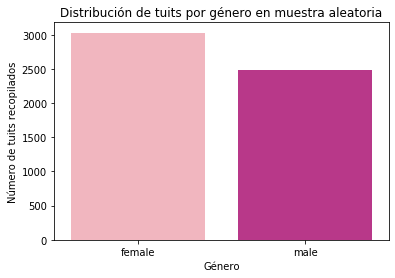

In [21]:
# Construcción de la gráfica
sequential_colors = sns.color_palette("RdPu", 2)
sns.set_palette(sequential_colors)
gender_plot = sns.barplot(x = 'gender', y ='text', data = gender_tuits)
gender_plot.set(xlabel='Género', ylabel='Número de tuits recopilados', title = "Distribución de tuits por género en muestra aleatoria")


In [22]:
#Transformación de los datos
office_tuits = pd.DataFrame({'text' : tuits_labeled.groupby('office')['text'].count()})
office_tuits['office'] = office_tuits.index
office_tuits['percentage'] = round((office_tuits['text']/sum(office_tuits['text']))*100, 1)
office_tuits

,text,office,percentage
office,,,
congress,186,congress,3.4
executive,5316,executive,96.3
local,4,local,0.1
senate,14,senate,0.3


Text(2.9, 100, '0.4%')

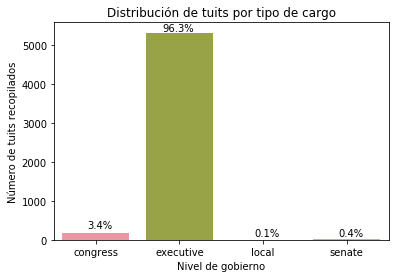

In [23]:
# Contrucción de la gráfica
sequential_colors = sns.color_palette("RdPu", 2)
sns.set_palette(sequential_colors)
office_plot = sns.barplot(x = 'office', y ='text', data = office_tuits)
office_plot.set(xlabel='Nivel de gobierno', ylabel='Número de tuits recopilados', title = "Distribución de tuits por tipo de cargo")

# Etiquetas de porcentajes 
office_plot.text(x = -0.1, y = 300, s = "3.4%")
office_plot.text(x = 0.8, y = 5350, s = "96.3%")
office_plot.text(x = 1.9, y = 100, s = "0.1%")
office_plot.text(x = 2.9, y = 100, s = "0.4%")


In [24]:
#Transformación de los datos: persona 
name_tuits = pd.DataFrame({'text' : tuits_labeled.groupby('name')['text'].count()})
name_tuits['name'] = name_tuits.index
name_tuits['percentage'] = round((name_tuits['text']/sum(name_tuits['text']))*100, 1)
name_tuits

,text,name,percentage
name,,,
Aníbal Ostoa Ortega,13,Aníbal Ostoa Ortega,0.2
Elsa Amabel Landín,4,Elsa Amabel Landín,0.1
Lucía Riojas,186,Lucía Riojas,3.4
Marcelo Ebrard,2390,Marcelo Ebrard,43.3
María Merced González,1,María Merced González,0.0
Olga Sánchez Cordero,2841,Olga Sánchez Cordero,51.5
Víctor Villalobos Arámbula,85,Víctor Villalobos Arámbula,1.5


In [25]:
# Distribución por agresividad
# Transformación de los datos
aggresive_tuits = pd.DataFrame({'text' : tuits_labeled.groupby('class')['text'].count()})
aggresive_tuits['class'] = aggresive_tuits.index
aggresive_tuits['percentage'] = round((aggresive_tuits['text']/sum(aggresive_tuits['text']))*100, 1)

In [26]:
# Transformación de los datos
aggresive_tuits = pd.DataFrame({'text' : tuits_labeled.groupby('class')['text'].count()})
aggresive_tuits['class'] = aggresive_tuits.index
aggresive_tuits['percentage'] = round((aggresive_tuits['text']/sum(aggresive_tuits['text']))*100, 1)
aggresive_tuits

,text,class,percentage
class,,,
aggresive,1075,aggresive,19.5
neutral,4445,neutral,80.5


Text(0.9, 4480, '80.5%')

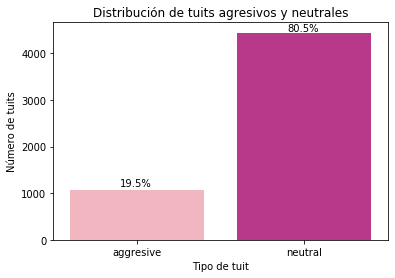

In [27]:
# Creación de la gráfica
sequential_colors = sns.color_palette("RdPu", 2)
sns.set_palette(sequential_colors)
aggresive_plot = sns.barplot(x = 'class', y ='text', data = aggresive_tuits)
aggresive_plot.set(xlabel='Tipo de tuit', ylabel='Número de tuits', title = "Distribución de tuits agresivos y neutrales")

aggresive_plot.text(x =-0.1, y = 1150, s = "19.5%")
aggresive_plot.text(x = 0.9, y = 4480, s = "80.5%")


In [28]:
# Tuits misóginos 
# Transformación de los datos
aggresive = tuits_labeled['class'] == "aggresive"
aggresive_tuits = tuits_labeled[aggresive]

misogynistic_tuits = pd.DataFrame({'text' : aggresive_tuits.groupby('gendered')['text'].count()})
misogynistic_tuits['gendered'] = misogynistic_tuits.index
misogynistic_tuits['percentage'] = round((misogynistic_tuits['text']/sum(misogynistic_tuits['text']))*100, 1)
misogynistic_tuits

,text,gendered,percentage
gendered,,,
0.0,982,0.0,91.3
1.0,93,1.0,8.7


Text(0.9, 120, '8.7%')

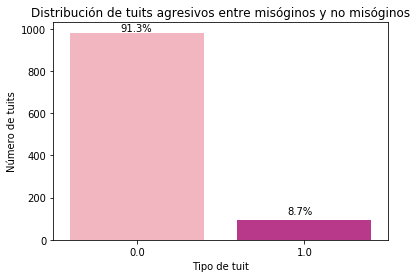

In [29]:
# Creación de la gráfica
sequential_colors = sns.color_palette("RdPu", 2)
sns.set_palette(sequential_colors)
misogynistic_plot = sns.barplot(x = 'gendered', y ='text', data = misogynistic_tuits)
misogynistic_plot.set(xlabel='Tipo de tuit', ylabel='Número de tuits', title = "Distribución de tuits agresivos entre misóginos y no misóginos")
misogynistic_plot.text(x =-0.1, y = 990, s = "91.3%")
misogynistic_plot.text(x = 0.9, y = 120, s = "8.7%")

#### Algoritmo: división de los datos entre entrenamiento y prueba

In [30]:
# Dividimos la información en datos de entrenamiento y datos de prueba
from sklearn.model_selection import train_test_split

# Separamos las características a predecir
x_all = tuits_labeled.drop(['class', 'gendered'], axis = 1)
y_all = tuits_labeled[['class', 'gendered']]
num_test= 0.8

x_train, x_test, y_train, y_test = train_test_split(x_all, y_all, test_size = 0.2)

#### Preprocesamiento de texto: paquete Tweet-Preprocessor

In [31]:
# Procesamiento de texto con Tweet-Preprocessor
# Ejemplo de uso 
print(p.tokenize('Preprocessor is #awesome 👍 https://github.com/s/preprocessor'))
print(p.clean('Preprocessor is #awesome 👍 https://github.com/s/preprocessor'))
print(p.parse('Preprocessor is #awesome https://github.com/s/preprocessor'))

Preprocessor is $HASHTAG$ $EMOJI$ $URL$
Preprocessor is


In [32]:
p.clean(x_train['text'])

TypeError: expected string or bytes-like object

In [65]:
p.clean(str(x_train['text']))

'RT : Auge y declive de Medina Mor...4743 RT : Que qued la favorita del presi...5173 ...3314 RT : Donde estn las pipas? Las f...1711 RT : Creen que todos somos i... ... Jajajajaj...4107 ...107 RT : Aunque usted no lo crea, los p...941 RT : Y entonces no hubiera sido mejo...5104 RT : Gracias, Canciller. Ojal el G...Name: text, Length: , dtype: object'

#### Preprocesamiento de texto: paquete TextModel

In [33]:
#Importar la paquetería 
from microtc.textmodel import TextModel
# Establecer el objeto que contiene el texto de entrenamiento
corpus = x_train
# Ajustar a un modelo de texto
textmodel = TextModel().fit(corpus)
# Aplicar las transformaciones
x_train_processed = textmodel.transform(corpus)
x_train_processed

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [34]:
# Establecer el objeto que contiene el texto de prueba
corpus = x_test
# Ajustar a un modelo de texto
textmodel = TextModel().fit(corpus)
# Aplicar las transformaciones
x_train_processed = textmodel.transform(corpus)
x_train_processed

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

#### Algoritmo

In [35]:
#### Definir algorimo 
from sklearn.ensemble import RandomForestClassifier
# Seleccionamos el tipo de clasificador, en este caso RandomForest. 
clf = RandomForestClassifier(n_estimators=20, max_features='sqrt', criterion='entropy', max_depth=5)
clf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
clf2 = RandomForestClassifier()
clf2

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
#y_train.fillna(method = 'bfill')
#y_train.fillna(0)
y_train['gendered'].replace(np.nan, 0)

1133    0.0
4598    0.0
2752    0.0
4034    0.0
4296    0.0
       ... 
1106    0.0
646     0.0
176     0.0
1238    0.0
5226    0.0
Name: gendered, Length: 4416, dtype: category
Categories (2, float64): [0.0, 1.0]

In [38]:
from sklearn.impute import SimpleImputer
# Create our imputer to replace missing values with the mean e.g.
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(x_train_processed)

# Impute our data, then train
X_train_imp = imp.transform(x_train_processed)
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(x_train_processed, y_train)

ValueError: Input contains NaN

In [39]:
# Entrenamiento del algoritmo 
clf.fit(x_train_processed, y_train)

ValueError: Input contains NaN

#### Conclusiones
- Existen elementos para creer que la violencia digital que reciben las mujeres que desempeñan labores políticas es diferente a aquella que reciben los hombres. 
- La diferencia se debería a razones de _género_.
- Esto no implica que los hombres no reciban violencia, ni tampoco que estén excentos de la violencia de género. 
- Más investigación es necesaria en este tema que ha sido poco estudiado.